# EE350: Lab 2 ‒  Transformée de Fourier

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import os
import numpy as np
from scipy.signal import convolve2d, get_window

%matplotlib inline

## 1 Transformée de Fourier discrète (TFD)

La TFD $X\left(f\right)$ du signal $x\left(n \right)$ de longueur $N$ est donnée par:
$$
X\left(f\right) = \sum_{n = n_0}^{n_0 + N - 1} x\left(n \right) W_{N}^{-kn}
$$

et sa transformée inverse par:

$$
x\left(n \right) = \frac{1}{N} \sum_{k = 0}^{N - 1} X\left(k\right)  W_{N}^{kn}
$$

où $W_{N} = \text{exp}\left(j\frac{2\pi}{N}\right)$.

### 1.1 Base de la TFD

La première équation ci-dessus montre comment un signal $x$ est projetée sur un ensemble de fonctions de base. Quelles sont ces fonctions de base?

<center style="color:blue">Votre réponse ici</center>


### 1.2 TFD d'un vecteur de cette base

Le signal $x_w[n]$ est défini comme:

$$x_w[n] = w[n] \cdot x[n]$$ 

$$x[n]=\cos \left( \frac{2 \pi f n}{f_s} \right)$$

où $w[n]$ est une fenêtre rectangulaire de taille $N=100$ et , avec $f = 90$ Hz et $f_s = 1000$ Hz.

Calculez et affichez la TFD (seulement son module) du signal $x_w[n]$ fenêtré par un rectangle, en vous aidant de la fonction `plt.stem(...)`. 

- Décrivez la transformée obtenue. Combien de coefficients non-nuls la transformée de Fourier possède-t-elle? Pourquoi ?


**Conseil**: La fenêtre peut être générée en utilisant la commande `get_window(...)` du package `scipy.signal`. Vous pouvez trouver des détails sur son utilisation dans la documentation en ligne.

<center style="color:blue">Votre réponse ici</center>


In [2]:
# ...

### 1.3 Longueur de la fenêtre

Considérez maintenant une fenêtre rectangulaire avec une taille différente ($N = 75$). Calculez et affichez le signal et sa transformée de Fourier. 
- Quel est le nombre de coeficients non-nuls de la transformée de Fourier? Expliquez la différence avec le cas précédent.

<center style="color:blue">Votre réponse ici</center>


In [3]:
# ...

## 1.4 Type de fenêtre

Répétez les deux étapes précédentes avec les paramètres suivants :

- Fenêtre triangulaire de longueur $N = 100$
- Fenêtre triangulaire de longueur $N = 75$
- Fenêtre de Blackman-Harris de longueur $N = 100$
- Fenêtre de Blackman-Harris de longueur $N = 75$

Pour chaque cas, tracez le signal fenêtré $x_w(n)$ ainsi que sa TFD. Veillez à mettre correctement à l'échelle les axes.
- Quels sont le nombre de coeficients non-nuls dans chaque cas ? Comparez les résultats avec la fenêtre rectangulaire. Comparez les spectres obtenus et commentez ? Concluez sur ce qu'est un bon fenêtrage.

<center style="color:blue">Votre réponse ici</center>


In [4]:
# ...

## 2. Transformée de Fourier discrète 2D et convolution

Dans cette section, nous allons revoir la relation importante entre la transformée de Fourier et l'opération de convolution. Nous illustrerons ces concepts en 2D. 

Considérons un système linéaire $h$ et invariant qui prends en entrée une image en nuances de gris $y$ et produit une nouvelle image en nuance de gris $v$.

L'entrée et la sortie du système sont liées par l'opération de convolution, désignée par $*$. La sortie est la convolution de l'entrée $y$ avec la réponse impulsionnelle du système $h$, c'est-à-dire $v = y * h$. En 2D, l'opérateur de convolution est défini pour chaque point de sortie $(n, m)$ comme :

$
\begin{aligned}
    v\left(n, m\right)  & = \left(y * h\right)\left( n, m \right) \\
                        & = \sum_{o=-\infty}^{+\infty}\sum_{p=-\infty}^{+\infty} h\left(o, p\right) y\left(n-o, m-p\right)
\end{aligned}
$

Cette équation donne l'expression de chaque pixel $(n,m)$ de l'image de sortie par rapport à l'image d'entrée et au système. La transformée de Fourier et l'opération de convolution sont liées par une propriété importante, qui est la suivante 

$
\begin{aligned}
V\left(k, l\right) & = \mathcal{F}\left(v\right)\\
                & = \mathcal{F}\left(y * h \right) \\
                & = \mathcal{F}\left(y\right)\mathcal{F}\left(h\right) \\
                & =   Y\left(k, l\right)H\left(k, l\right)
\end{aligned}
$

où $k, l$ sont les fréquences dans le plan 2D, $\mathcal{F}$ est l'opérateur de transformée de Fourier et $V\left(k, l\right), Y\left(k, l\right), H\left(k, l\right)$ sont les transformées de Fourier de $v\ , y\ , h$ respectivement.

Dans le domaine de Fourier, la convolution se transforme en une simple multiplication des transformées de Fourier $Y(k, l)$ et $H(k, l)$. La fonction $H(k, l)$ est définie comme la fonction de transfert du système $h$. Dans cet exercice, nous allons montrer que les calculs de $v\left(n, m\right)$ avec ces deux solutions sont équivalents.




### 2.1. Domaine temporel

Commençons par définir notre système $h(n,m)$. C'est un filtre gaussien 2D de variance $\sigma^2 = 5$ et de taille $(N_1, N_2) = (21, 21)$. 

$$  h[n, m] = \frac{1}{2 \pi \sigma^2} e^{- \frac{1}{2 \sigma^2} [(n-\frac{N_1-1}{2})^2 + (m-\frac{N_2-1}{2})^2] }  $$

Ecrivez une fonction `gkernel` qui prend en entrée le nombre de points du filtre et la variance, et sort la réponse impulsionnelle 2D `h`. Tracez ce filtre avec le module `matplotlib.pyplot` importé dans la première cellule du cahier. En utilisant la définition de l'opération de convolution, quelle est l'expression mathématique de la convolution avec notre noyau? Plus précisément, quelles sont les limites des sommes? Pourquoi ?

<center style="color:blue">Votre réponse ici</center>


In [5]:
def gkernel(N: int,  var: float):
    """ Createa a 2D Gaussian filter with given variance.

    Parameters
    ----------
    N : int
        Size of the filter
    var : float
        Variance of the filter

    Returns
    -------
    gfilter : np.ndarray (N, N)
        Gaussian filter
    """
    
    # Create empty filter
    gfilter = np.nonzero((N, N))
    
    return  gfilter


Maintenant que nous avons notre système, nous avons besoin d'une entrée. Nous allons utiliser une image libre de droits.

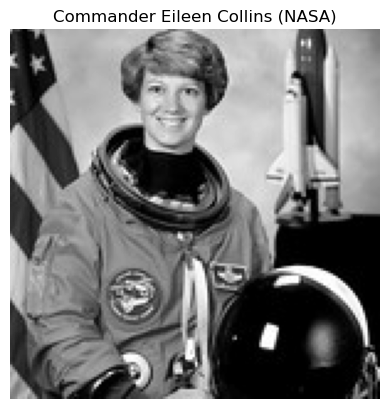

In [6]:
# Define Image URL
url = "https://live.staticflickr.com/8674/16504233985_9f1060624e_q_d.jpg"
local = "astronaut.jpg"

# Check if download is needed
if not os.path.exists(local):
    print("Download image ...")
    urllib.request.urlretrieve(url, local)
    
# Load and display image
y = mpimg.imread(local)
# Convert to gray scales
y = 0.299 * y[..., 0] + 0.587 * y[..., 1] + 0.114 * y[..., 2]

plt.imshow(y, cmap="gray")
plt.title("Commander Eileen Collins (NASA)")
plt.axis("off")
plt.show()

Enfin, calculons la sortie du système $v_t$. Utilisez la fonction `convolve2d(...)` du paquet `scipy.signal` avec l'argument `mode='full'` pour calculer la convolution 2D entre l'image d'entrée $y$ et la réponse impulsionnelle du système $h$. Tracez-la en niveaux de gris avec `matplotlib.pyplot`. 
Quelle est la taille $(M1, M2)$ de l'image? Quelle est la taille $(L1, L2)$ de l'image de sortie ?

A partir de la définition de l'opération de convolution :
- Quel est l'effet principal de la transformation sur l'image ? Expliquez.
- Expliquez la taille de l'image de sortie. Quelle est la relation mathématique entre les dimensions d'entrée et de sortie ?
- Du point de vue de la complexité de calcul, quelle est la manière la plus efficace d'implémenter l'opération de convolution ?

<center style="color:blue">Votre réponse ici</center>


In [7]:
# ...

### 2.2 Domaine fréquentiel

Maintenant, calculons la sortie $v_f$ dans le domaine de Fourier. Calculez les transformations de Fourier 2D de l'entrée $y$ et de la réponse impulsionnelle du filtre $h$ respectivement. Vous devez spécifier le nombre de points dans la transformée de Fourier finale, qui est $(L_1, L_2)$ dans notre cas. Tracez la valeur absolue de chaque transformée de Fourier en échelle logarithmique. Ensuite, calculez le signal de sortie $v_f$ et tracez le résultat à côté du précédent $v_t$.

A partir de votre code: 
- Expliquez la forme de la valeur absolue des transformées de Fourier.
- Comparez les résultats de $v_t$ et $v_f$.
- Expliquez pourquoi nous devons spécifier un nombre de points pour les calculs de la transformée de Fourier.

<center style="color:blue">Votre réponse ici</center>


In [8]:
# ...

Enfin, calculons le signal $v_f$ avec les transformées de Fourier calculées sur une grille de taille $(M_1, M_2)$. Répétez les opérations du point précédent avec une grille de taille $(M_1, M_2)$ au lieu de $(L_1, L_2)$ et tracez les résultats.

- Expliquez les différences entre la nouvelle et la précédente transformée de Fourier. Quelle est l'influence de la taille de la grille ?
- Comparez les résultats de $v$.

<center style="color:blue">Votre réponse ici</center>


In [9]:
# ...